<a href="https://colab.research.google.com/github/VarunVaibhav/Basic-Banking-System/blob/main/GOOD_AND_BAD_CUSTOMERS_FOR_GRANTING_CREDIT_BY_VARUN_VAIBHAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('/content/BankCreditCard.csv')

In [3]:
data.head()

Customer ID  Credit_Amount  ...  Previous_Payment_June  Default_Payment
0            1        20000.0  ...                    0.0                1
1            2       220000.0  ...                 2000.0                1
2            3        90000.0  ...                 5000.0                0
3            4        50000.0  ...                 1000.0                0
4            5        50000.0  ...                  679.0                0

[5 rows x 25 columns]

In [4]:
data.isnull().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [5]:
data.shape

(30000, 25)

In [6]:
data.Default_Payment.unique()

array([1, 0])

In [7]:
data['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

Almost 78% belongs to No Payment and 22% belongs to Yes Payemnt

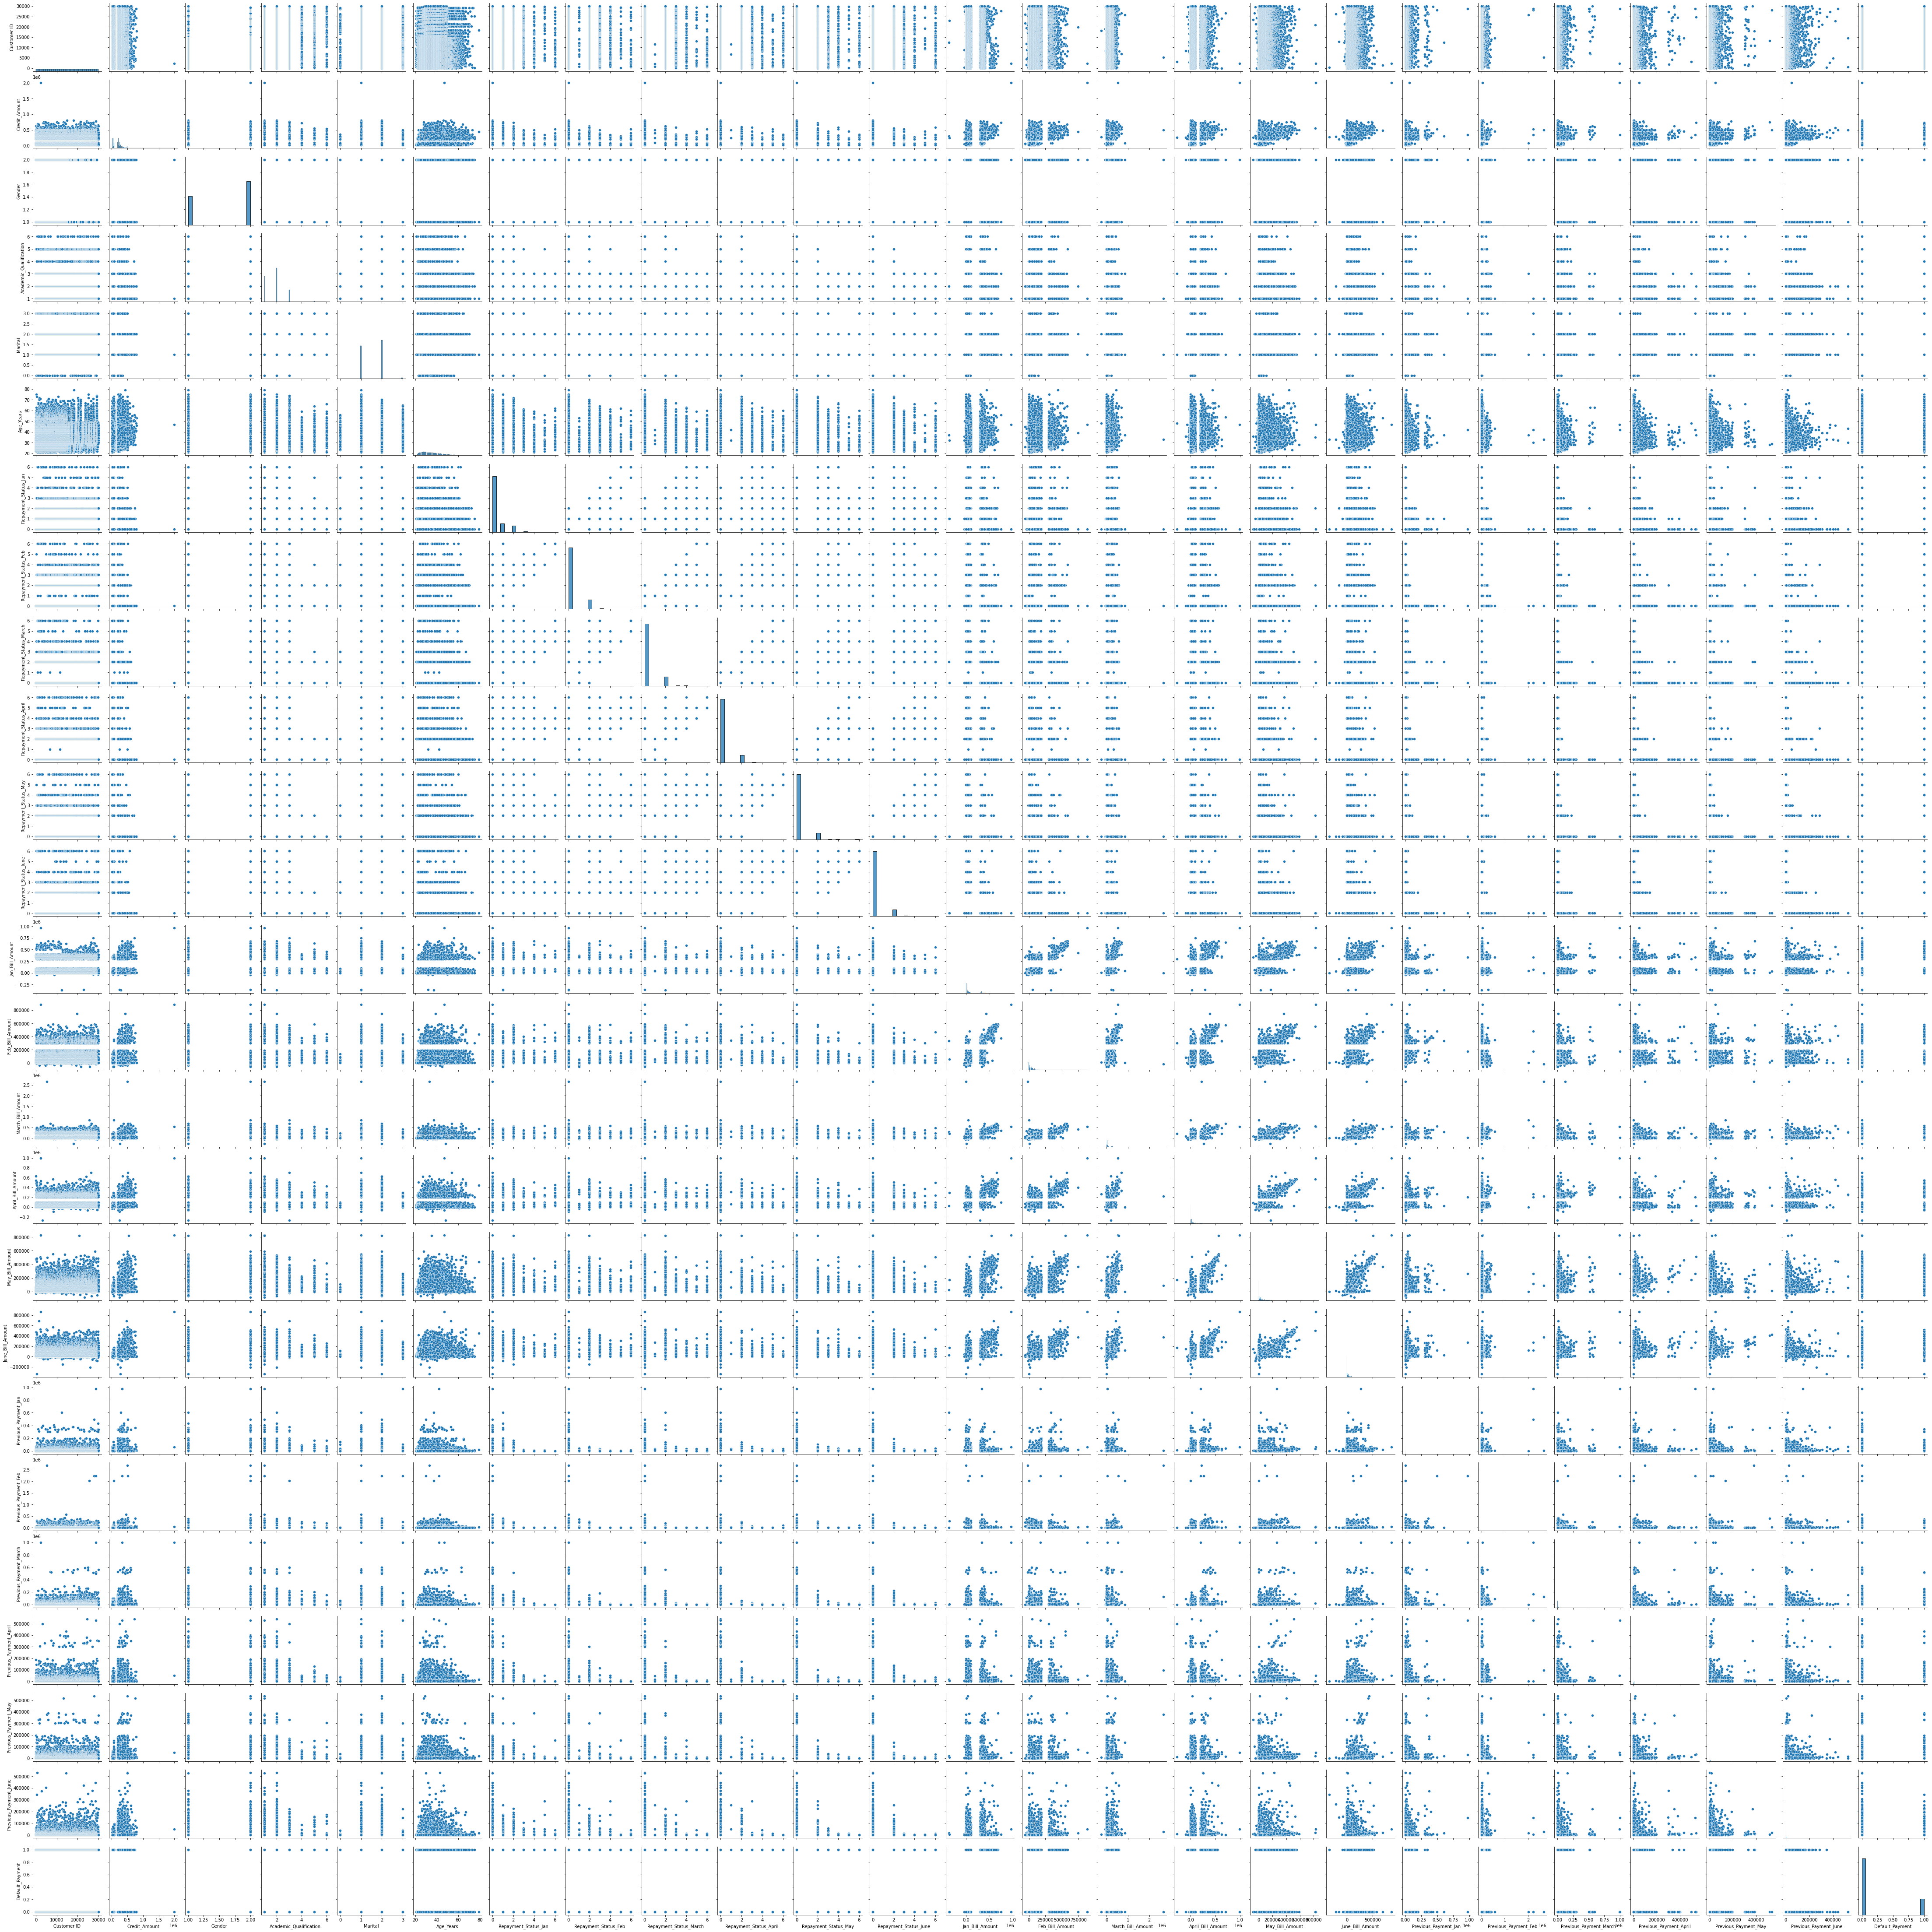

In [8]:
sns.pairplot(data)

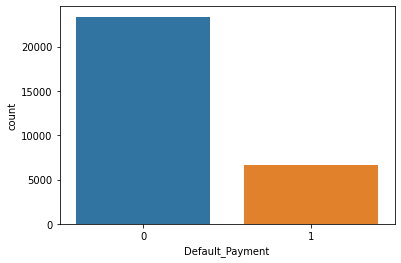

In [19]:
x = data['Default_Payment']
sns.countplot(x = x)

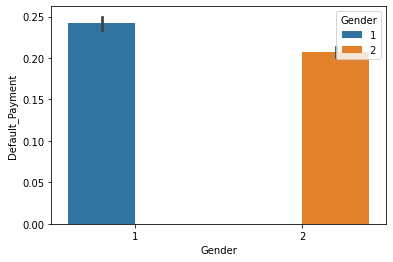

In [18]:
x = data.Gender
y = data.Default_Payment
sns.barplot(x=x, y=y,hue=x)

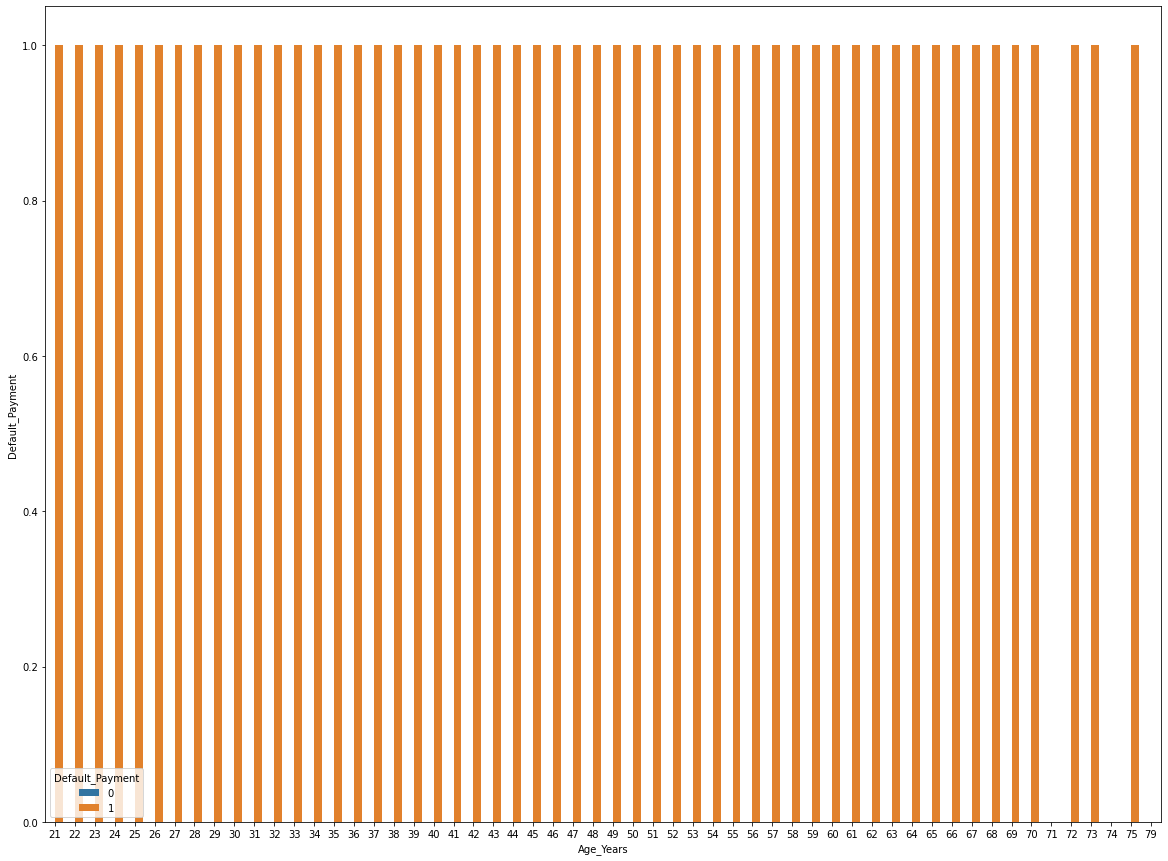

In [17]:
plt.figure(figsize=(20,15))
x = data['Age_Years']
y = data['Default_Payment']
sns.barplot(x = x, y = y,hue= y)

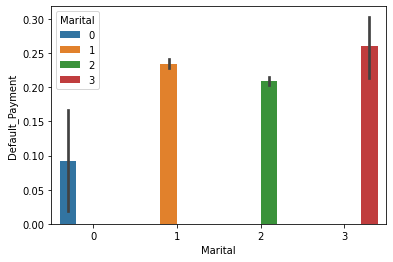

In [16]:
x = data['Marital']
y = data['Default_Payment']
sns.barplot(x=x,y=y,hue=x)

We can see category 0 which is not defined in the data description. So removing the category 0

In [20]:
data.drop(data[data['Marital'] ==0].index, inplace = True)

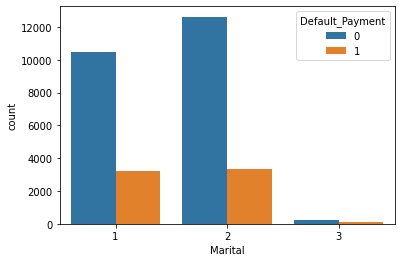

In [23]:
sns.countplot(data=data, x=data.Marital, hue=data.Default_Payment)

The category 2 i.e., Single are the ones who stands first in terms of making no payment, then category 1= Married. However,Category 3 is balanced.

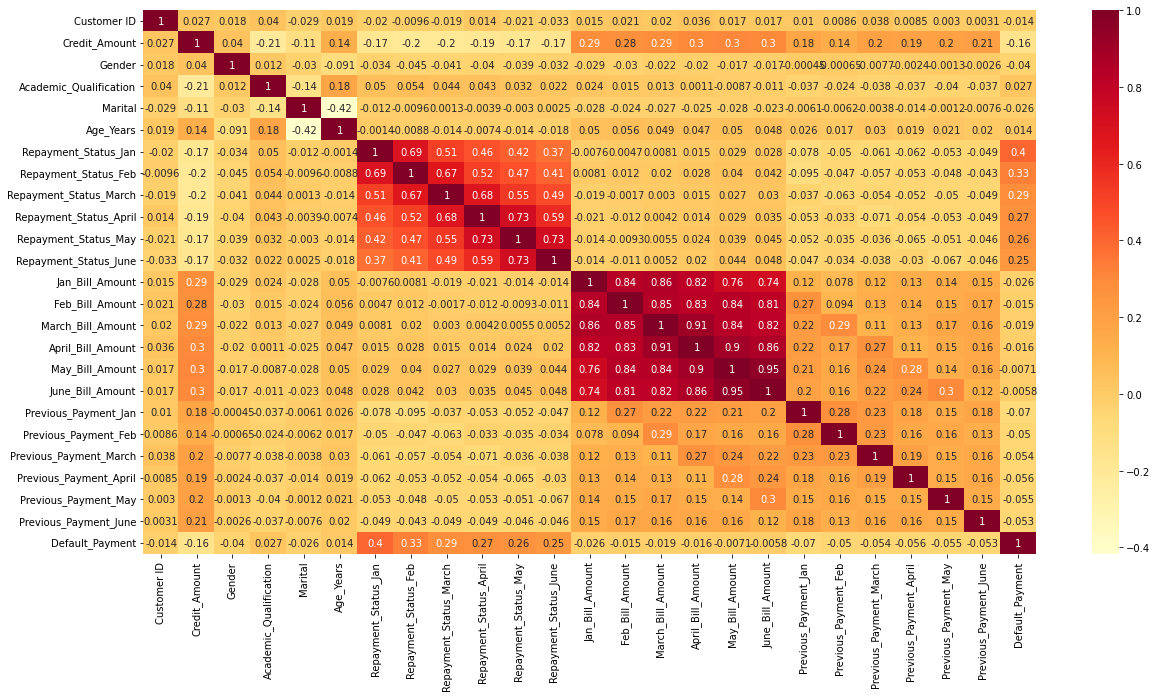

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot= True, cmap="YlOrRd")

**Model Building**

In [25]:
data1= data.drop('Customer ID',axis=1)

In [26]:
x=data1.drop('Default_Payment',axis=1)
y=data['Default_Payment']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [29]:
sc.fit_transform(x_train)

array([[-1.00240753, -1.23463583,  0.18821602, ..., -0.24323394,
        -0.23255101, -0.22950211],
       [ 0.2760434 ,  0.80995544,  0.18821602, ..., -0.03775134,
        -0.01586625, -0.299085  ],
       [ 0.50165238, -1.23463583,  0.18821602, ..., -0.30965499,
         0.01341548, -0.299085  ],
       ...,
       [ 0.2008404 , -1.23463583,  1.45642053, ..., -0.30965499,
         2.84700796,  5.82768875],
       [ 0.50165238,  0.80995544,  0.18821602, ...,  1.55122148,
        -0.30868349, -0.299085  ],
       [ 0.2008404 , -1.23463583, -1.07998849, ..., -0.10924455,
        -0.12637548,  0.01461787]])

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
pred= model.predict(x_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

**LOGISTIC REGRESSION GIVES THE ACCURACY SCORE FOR PREDICTING THE DATASET**

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7028
           1       0.50      0.00      0.00      1956

    accuracy                           0.78      8984
   macro avg       0.64      0.50      0.44      8984
weighted avg       0.72      0.78      0.69      8984



In [37]:
confusion_matrix(y_test,pred)

array([[7027,    1],
       [1955,    1]])

In [38]:
false_positive_rate, true_positive_rate, threshold2 = roc_curve(y_test, pred)

In [39]:
print('Accuracy Score for Logistic Regression: ', roc_auc_score(y_test, pred))

Accuracy Score for Logistic Regression:  0.5001844797264346


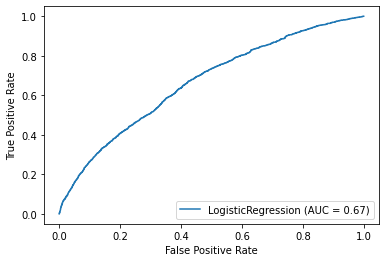

In [40]:
from sklearn import metrics
metrics.plot_roc_curve(model, x_test, y_test)